<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module4_Assignment_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
#!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 76 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [3]:
dat_1 = pd.read_csv('ML_656/Allstate_train1.csv')
dat_2 = pd.read_csv('ML_656/Allstate_train2.csv')
dat_3 = pd.read_csv('ML_656/Allstate_train3.csv')
df = pd.concat([dat_1,dat_2,dat_3])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188317 entries, 0 to 68316
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 191.1+ MB


In [5]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000
mean,294136.546440,0.493862,0.507190,0.498918,0.491814,0.487429,0.490946,0.484971,0.486439,0.485507,0.498067,0.493512,0.493152,0.493139,0.495718,3037.346151
std,169336.357671,0.187640,0.207201,0.202105,0.211292,0.209027,0.205272,0.178450,0.199370,0.181660,0.185876,0.209736,0.209426,0.212777,0.222488,2904.091574
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.000000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294542.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.580000
75%,440682.000000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.050000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
df = df[df['loss']>100]

In [8]:
#Convert categoricals into dummies
del df['id']
objects = []
for c in df.columns:
    if str(df[c].dtype) == 'object':
        objects.append(c)
X_ = df.drop(objects, axis = 1).astype('float64')
X_ = X_.drop(['loss'], axis = 1)
dummies = pd.get_dummies(df[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
y = df.loss

In [9]:
X

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,cat11_B,cat12_B,cat13_B,cat14_B,cat15_B,cat16_B,cat17_B,cat18_B,cat19_B,cat20_B,cat21_B,cat22_B,cat23_B,cat24_B,cat25_B,cat26_B,...,cat116_LU,cat116_LV,cat116_LW,cat116_LX,cat116_LY,cat116_M,cat116_MA,cat116_MB,cat116_MC,cat116_MD,cat116_ME,cat116_MF,cat116_MG,cat116_MH,cat116_MI,cat116_MJ,cat116_MK,cat116_ML,cat116_MM,cat116_MN,cat116_MO,cat116_MP,cat116_MQ,cat116_MR,cat116_MS,cat116_MT,cat116_MU,cat116_MV,cat116_MW,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68312,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68313,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68314,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68315,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X,y,test_size = 0.6, random_state=2)
y_train = np.log(y_train)
y_val = np.log(y_val)
y_test = np.log(y_test)

In [11]:
model_ols = LinearRegression(fit_intercept=True)
model_ols.fit(X_train, y_train)
print(model_ols.intercept_)
print(model_ols.coef_)

-19725456645.181858
[-1.54929798e-01  2.17782336e-01  2.34425015e-01 ...  0.00000000e+00
  0.00000000e+00 -2.66325883e+09]


In [12]:
TestRMSE_ols = np.sqrt(mean_squared_error(y_test,model_ols.predict(X_test)))
print(TestRMSE_ols)

1304660241.0060358


In [14]:
tmp = model_ols.predict(X_test)-y_test
print(np.median(tmp))
print(np.quantile(tmp,0.9))
print(np.quantile(tmp,0.99))
print(np.quantile(tmp,0.999))
print(np.amax(tmp))

-0.009507263638151464
0.7005320302231002
1.4007932171854858
3.1286023159312557
240975545395.80322


In [15]:
alphas = np.array([0.000001, 0.000003, 0.000007, 0.00001, 0.0001, 0.001])
model_lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
MSE = []
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coefs.append(model_lasso.coef_)
    MSE.append(mean_squared_error(y_val, model_lasso.predict(X_val)))

In [23]:
RMSE = np.sqrt(MSE)
RMSE

array([0.56483571, 0.56444628, 0.56407866, 0.56411633, 0.58435664,
       0.72678256])

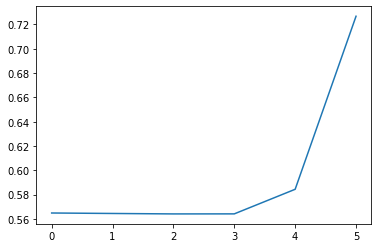

In [24]:
plt.plot(RMSE)

In [27]:
model_lasso.set_params(alpha=0.000007)
model_lasso.fit(X_test, y_test)
TestRMSE_lasso = np.sqrt(mean_squared_error(y_test,model_lasso.predict(X_test)))
print(TestRMSE_lasso)

0.5587851996618185


In [26]:
tmp = model_lasso.predict(X_test)-y_test
print(np.median(tmp))
print(np.quantile(tmp,0.9))
print(np.quantile(tmp,0.99))
print(np.quantile(tmp,0.999))
print(np.amax(tmp))

-0.008527039329288222
0.6976620038899606
1.3751666089690024
2.2509905673311104
4.11051004384719
